<a href="https://colab.research.google.com/github/ayush9453/TSF-GRIP-TASK/blob/main/TSF_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Step 1 :- Reading Data from online source

In [2]:
### Reading data from remote link
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script.

## Step 2 : Data Visualization

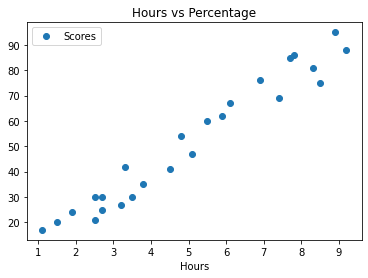

In [3]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.show()

## Step 3 :- Preparing The Data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

## Step 4 :- Algorithm Training
Splitting the data into training data-set and test data-set. Then, start training the algorithm.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 5 :- Ploting the line of regression

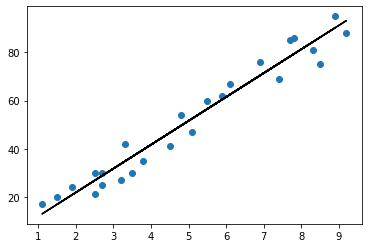

In [7]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()

## Step 6 :- Making Predictions


In [8]:

print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Step 7 :- Comparing Actual vs Predicted

In [9]:

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [10]:
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
### Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9515510725211553
Testing score: 0.9454906892105354


In [13]:
### Testing your own data.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


## Step 8 :- Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root mean squared Error: 4.647447612100373
